### Amazon Book Reviews: Review of the top 50 reviewers: Exploratory Data Analysis

The original dataset has ~9 million reviews: http://jmcauley.ucsd.edu/data/amazon/.  I have created a subset which contains data of reviewers who have done maximum number of reviews. Here, we will take a closer look at these reviewers to find some insights. Some reviewers have corporate name, e.g., Midwest Book Reviews and some are individual personnel, e.g., Harriet Klausner. We will be asking the following questions here: 
<p> Can we segment these reviewers based on their review texts? Are corporate reviewers in any ways different than the individuals? Does more reviews mean better helpfulness? What are the mean text lengths of their reviews?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.io import gbq
%matplotlib inline

In [2]:
df = pd.read_csv('top50reviews.csv')

In [3]:
df.tail(2)

,reviewerID,reviewerName,asin,helpfulVote,totalVote,unixReviewTime,reviewText,wordLength,overall,summary
128756,AMX0PJKV4PPNJ,"E. R. Bird ""Ramseelbird""",0439895294,241,252,2007-09-30 00:00:00 UTC,There are some books that come across my plate...,1622,5,Beautiful doesn't even cover it
128757,A22RY8N8CNDF3A,"Loyd E. Eskildson ""Pragmatist""",0061429252,464,510,2011-09-20 00:00:00 UTC,"Suskind's ""Confidence Men"" is based on 746 hou...",1078,5,Objective Look at Presidential Leadership


In [4]:
len(df.asin.unique()) # Number of distinct books

88819

### Number of reviews for each reviewer

In [5]:
a = df.groupby(['reviewerID', 'reviewerName']).size().sort_values(ascending = False)
a

reviewerID      reviewerName                                    
AFVQZQ8PW0L     Harriet Klausner                                    23212
A14OJS0VWMOSWO  Midwest Book Review                                 16090
A2F6N60Z96CAJI  Bookreporter                                         5878
A320TMDV6KCFU   MNix                                                 4209
AHUT55E980RDR   Neal C. Reynolds                                     3061
A13QTZ8CIMHHG4  LAS Reviewer "The Long and the Short Of It Re...     2948
A1K1JW1C5CUSUZ  Donald Mitchell "Jesus Loves You!"                   2906
A328S9RN3U5M68  Grady Harp                                           2795
A2TX179XAT5GRP  TeensReadToo "Eat. Drink. Read. Be Merrier."         2527
A21NVBFIEQWDSG  Armchair Interviews                                  2526
A2VKWLCNZF4ZVB  The RAWSISTAZ Reviewers                              2433
A1S3C5OFU508P3  Charles Ashbacher                                    2317
A1X8VZWTOG8IS6  Blue Tyson "- Research Finished

**Harriet Klausner** has written 23,212 reviews. She is a hall of fame reviewer and has a wiki page: https://en.wikipedia.org/wiki/Harriet_Klausner. She has a fair amount of criticism too. 


### Total number of votes

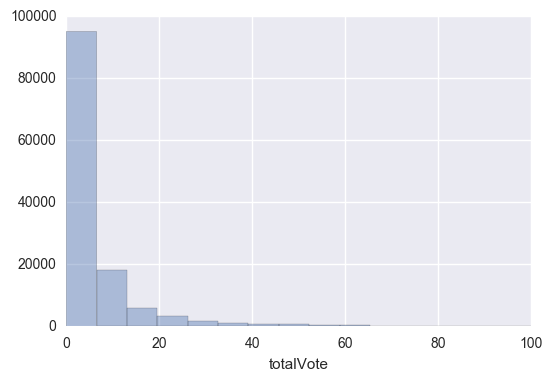

In [6]:
sns.distplot(df.totalVote, kde = False, bins = 200)
plt.xlim([0, 100])
plt.show()

In [7]:
len(df)  ## total entries

128758

In [8]:
len(df[df.totalVote == 0]) ## total 0 votes 

26541

In [9]:
len(df[df.totalVote > 0]) ## total non zero votes

102217

### Number of reviews over the years

In [10]:
df.loc[:, 'unixReviewTime'] =  pd.to_datetime(df.loc[:, 'unixReviewTime'])

In [11]:
a = df.groupby(df.unixReviewTime.dt.year).size()
a

unixReviewTime
1998       13
1999      198
2000     2430
2001     3669
2002     3200
2003     4318
2004     6541
2005     7777
2006     9160
2007    11781
2008    11069
2009    11988
2010    12940
2011    10229
2012    11286
2013    14371
2014     7788
dtype: int64

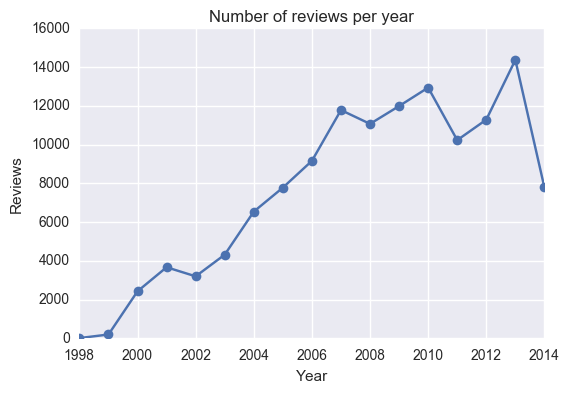

In [12]:
sns.set_style('darkgrid')
a.plot(kind = 'line', marker = 'o')
plt.xlabel("Year")
plt.title("Number of reviews per year")
plt.ylabel("Reviews")
plt.show()

This plot **does not** show a sharp rise in 2013, as opposed to the original (9 million) dataset. 

### Star rating

In [13]:
a = df.groupby('overall').size()
a

overall
1     1102
2     2847
3    10596
4    36864
5    77349
dtype: int64

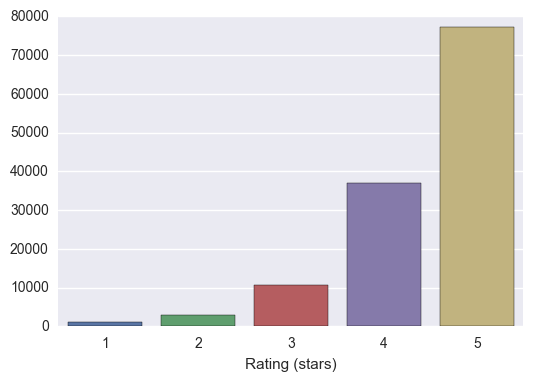

In [14]:
sns.barplot(a.index, a)
plt.xlabel("Rating (stars)")
plt.show()

### Reviews of Harriet Klausner 

In [15]:
drev1 = df [df.reviewerID == 'AFVQZQ8PW0L']
drev1.tail(2)

,reviewerID,reviewerName,asin,helpfulVote,totalVote,unixReviewTime,reviewText,wordLength,overall,summary
128549,AFVQZQ8PW0L,Harriet Klausner,0373802099,139,156,2004-07-28,In a world in which most people believe that m...,278,5,wonderful romantic fantasy
128695,AFVQZQ8PW0L,Harriet Klausner,0345492730,176,215,2005-11-02,At seven years of age Jesus was living on the ...,311,5,portrayal of Jesus as a young child


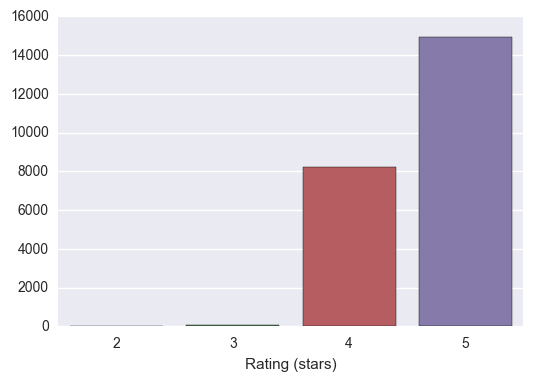

In [16]:
a = drev1.groupby('overall').size()
sns.barplot(a.index, a)
plt.xlabel("Rating (stars)")
plt.show()

In [17]:
drev1.loc[:, 'unixReviewTime'] =  pd.to_datetime(drev1.loc[:, 'unixReviewTime'])

C:\Users\Bis\Anaconda2\lib\site-packages\pandas\core\indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [18]:
b = drev1.groupby(drev1.unixReviewTime.dt.year).size()
b

unixReviewTime
1999      44
2000     782
2001    1015
2002     968
2003    1341
2004    1488
2005    1468
2006    1831
2007    1892
2008    2002
2009    2373
2010    2327
2011    2296
2012    1988
2013     997
2014     410
dtype: int64

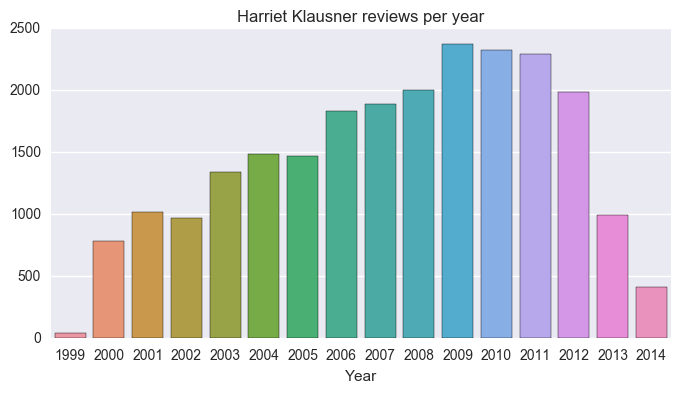

In [19]:
plt.figure(figsize= [8, 4])
sns.barplot(b.index, b)
plt.xlabel("Year")
plt.title ("Harriet Klausner reviews per year")
plt.show()

### Helpfulness ratings of the reviewers 

In [20]:
df['percHelpful'] = df.helpfulVote/df.totalVote
df['percHelpful'] = df['percHelpful'].fillna(0)
df.head(1)

,reviewerID,reviewerName,asin,helpfulVote,totalVote,unixReviewTime,reviewText,wordLength,overall,summary,percHelpful
0,A1JLU5H1CCENWX,NaN,B00HYQJPC2,0,0,2014-02-02,I made lots of notes in this book and I don't ...,581,5,Dex,0.0


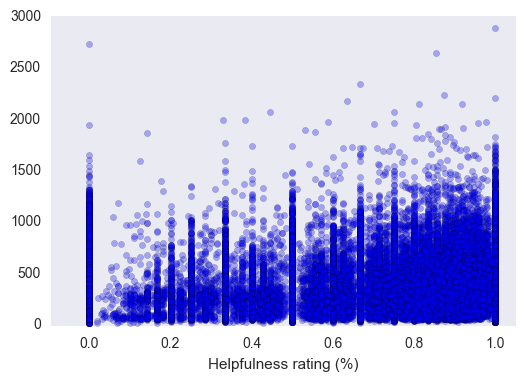

In [21]:
sns.set_style('dark')
plt.scatter(df.percHelpful, df.wordLength, alpha = 0.3)
plt.ylim([-20, 3000])
plt.xlim([-.095, 1.05])
plt.xlabel ("Helpfulness rating (%)")
plt.show()

This plot is similar to what we have seen before.

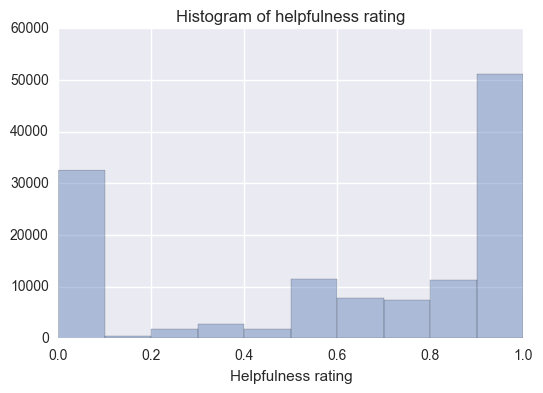

In [22]:
sns.set_style('darkgrid')
sns.distplot(df.percHelpful, kde = False, bins = 10)
plt.xlabel('Helpfulness rating')
plt.title('Histogram of helpfulness rating')

In [23]:
drev1 = df [df.reviewerID == 'AFVQZQ8PW0L']
drev1.tail(1)

,reviewerID,reviewerName,asin,helpfulVote,totalVote,unixReviewTime,reviewText,wordLength,overall,summary,percHelpful
128695,AFVQZQ8PW0L,Harriet Klausner,0345492730,176,215,2005-11-02,At seven years of age Jesus was living on the ...,311,5,portrayal of Jesus as a young child,0.818605


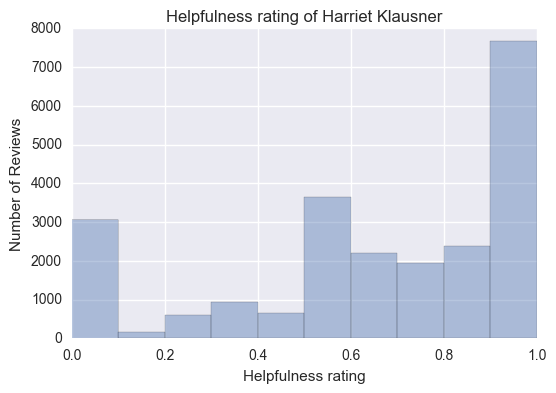

In [24]:
sns.distplot(drev1.percHelpful, kde = False, bins = 10)
plt.xlabel('Helpfulness rating')
plt.ylabel('Number of Reviews')
plt.title('Helpfulness rating of Harriet Klausner')
plt.show()

#### We can make ranges of helpfulness and see how many reviewers are in them

In [25]:
bins = [-.09, .25, 0.5, .75, 1.01 ]

In [26]:
group_names = ['below 25%', '25-50%', '51-75%', '76-100%']

In [27]:
df1 = df[['reviewerID', 'reviewerName', 'percHelpful']]

In [28]:
a = df1.groupby(['reviewerID', 'reviewerName'])

In [29]:
b = a['percHelpful'].mean().sort_values(ascending = False)
dhr = pd.DataFrame(b)
dhr = dhr.reset_index()
dhr

,reviewerID,reviewerName,percHelpful
0,A328S9RN3U5M68,Grady Harp,0.880532
1,A1MC6BFHWY6WC3,D. Blankenship,0.877999
2,AMX0PJKV4PPNJ,"E. R. Bird ""Ramseelbird""",0.857057
3,A3M174IC0VXOS2,Gail Cooke,0.827966
4,A26JGAM6GZMM4V,Robert Morris,0.810562
5,A2MF2QVSCUI27G,"Luan Gaines ""luansos""",0.776632
6,AC1K4OQOZ90RS,"E. Bukowsky ""booklover10""",0.774243
7,A281NPSIMI1C2R,"Rebecca of Amazon ""The Rebecca Review""",0.761835
8,A3R19YKNL641X3,"Thomas Duff ""Duffbert""",0.758509
9,A1M8PP7MLHNBQB,"John Matlock ""Gunny""",0.745602


**Grady Harp** is the most helpful reviewer. **Harriet Klausner** has a rating of 0.65. 

In [30]:
df1['category'] = pd.cut(df1.loc[:, 'percHelpful'], bins, labels=group_names)
df1.head(1)

C:\Users\Bis\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,reviewerID,reviewerName,percHelpful,category
0,A1JLU5H1CCENWX,NaN,0.0,below 25%


In [31]:
a = pd.value_counts(df1['category'])
a

76-100%      63994
below 25%    34420
51-75%       17013
25-50%       13331
Name: category, dtype: int64

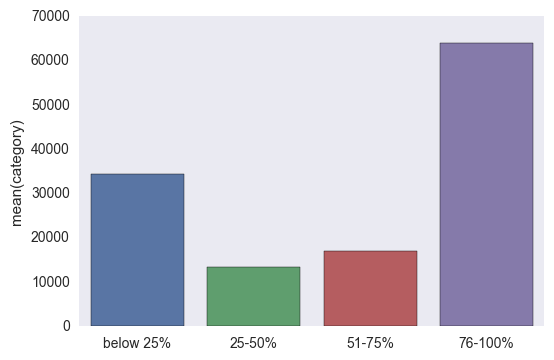

In [32]:
sns.set_style('dark')
sns.barplot(a.index, a)

In [33]:
g = df1.groupby(['reviewerID', 'reviewerName', 'category']).size().sort_values(ascending = False)
g.unstack().fillna('')

,category,below 25%,25-50%,51-75%,76-100%
reviewerID,reviewerName,,,,
A13G1TKIKHGV3F,M. Heiss,672,102,97,528
A13QTZ8CIMHHG4,"LAS Reviewer ""The Long and the Short Of It Re...",1271,104,120,1453
A14OJS0VWMOSWO,Midwest Book Review,3540,1677,2151,8722
A18FUHNBP90IB4,cb,550,149,162,411
A18JHVX925K101,Dii,270,50,58,859
A1CNQTCRQ35IMM,Jane,566,181,261,687
A1D2C0WDCSHUWZ,"E. A Solinas ""ea_solinas""",316,67,196,1045
A1D5RCOILPC9LX,Yolanda S. Bean,775,88,88,382
A1I2O9Y3X3HXLS,Arthur W. Jordin,175,323,305,1029


#### We can plot the reviewers helpfulness ratings according to the categories 

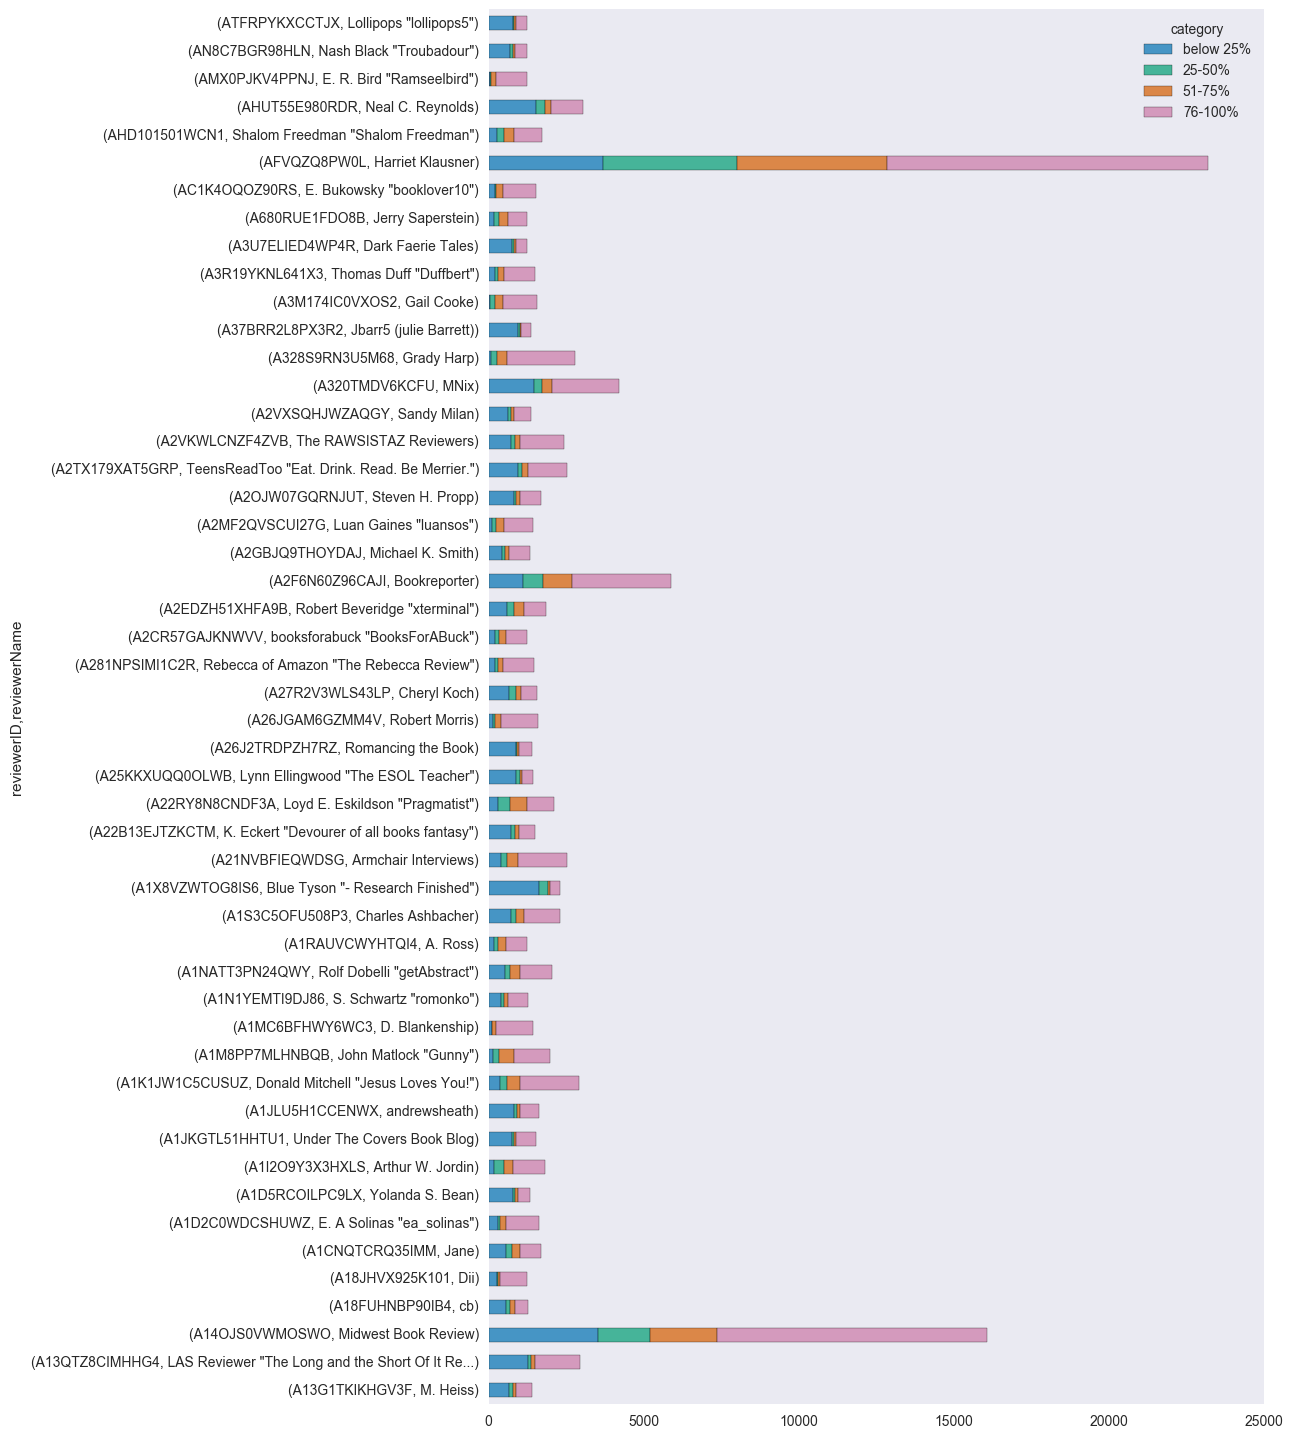

In [34]:
with sns.color_palette('colorblind', 10):
    g.unstack().plot(kind = 'barh', figsize = [10, 18], stacked = True, alpha = 0.7)
    #plt.ylim([-10, 10400])

#### Zoomed in version

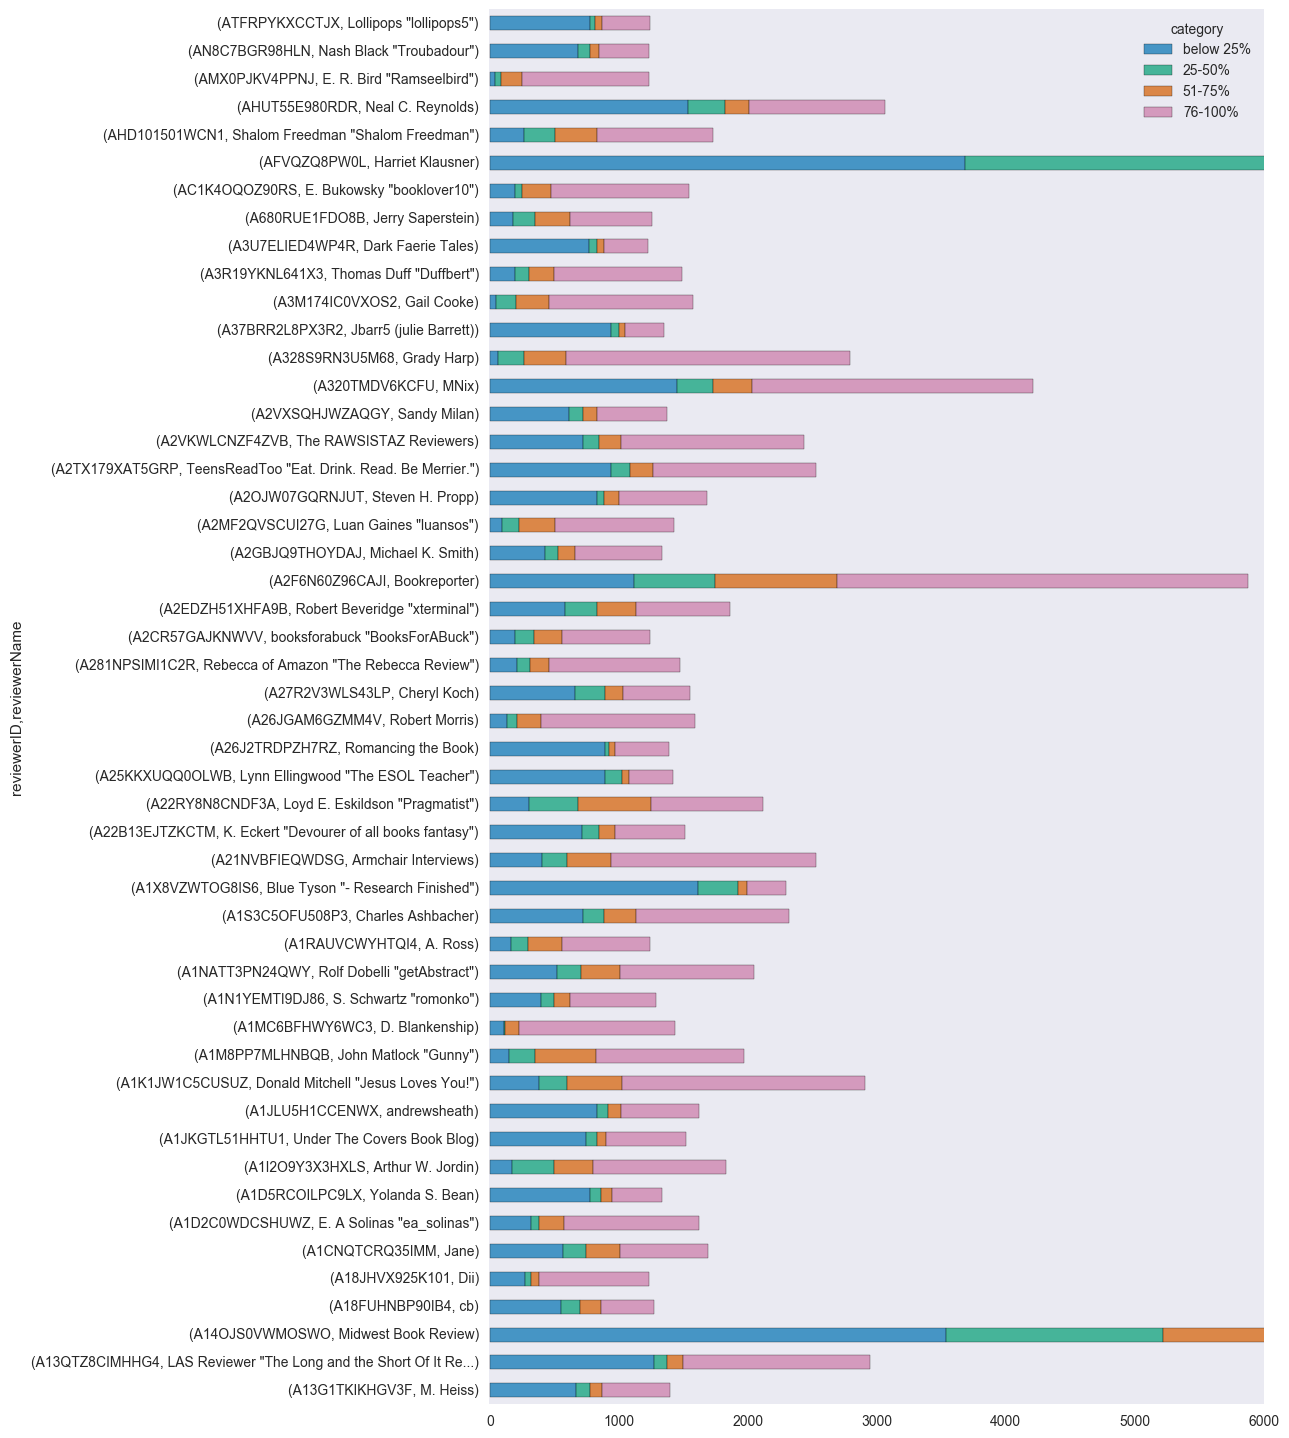

In [35]:
with sns.color_palette('colorblind', 10):
    g.unstack().plot(kind = 'barh', figsize = [10, 18], stacked = True, alpha = 0.7)
    plt.xlim([-10, 6000])

### Review text length as a function of year

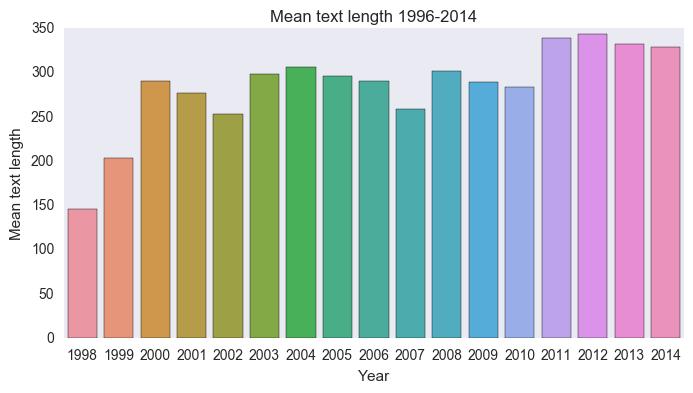

In [36]:
c = df.groupby(df.unixReviewTime.dt.year) # average length of reviews per year.
d = c['wordLength'].mean()
plt.figure(figsize= [8, 4])
sns.barplot(d.index, d)
plt.ylabel('Mean text length')
plt.xlabel('Year')
#plt.axhline(y= 184.0, linewidth=2, color='r')
plt.title('Mean text length 1996-2014')

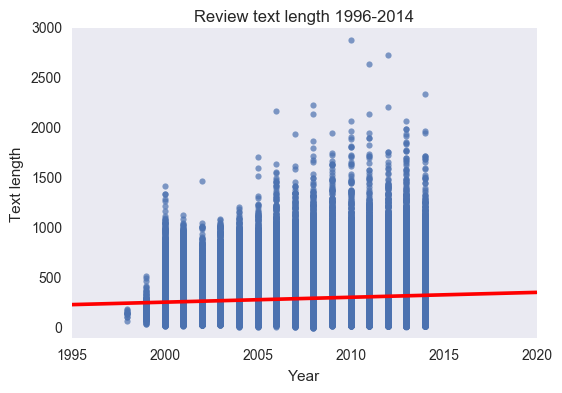

In [37]:
sns.regplot(x = df.unixReviewTime.dt.year, y = 'wordLength', data =df, scatter_kws={'alpha':0.7}, line_kws= {'color':'red'}, 
            fit_reg= True)
#plt.xlim([1994, 2009])
plt.ylim([-100, 3000])
plt.xlabel('Year')
plt.ylabel('Text length')
plt.title('Review text length 1996-2014')

In [38]:
df2 = df [['reviewerID', 'reviewerName', 'wordLength', 'percHelpful']]

In [39]:
df2['category'] = pd.cut(df2.loc[:, 'percHelpful'], bins, labels=group_names)
df2.head(1)

C:\Users\Bis\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,reviewerID,reviewerName,wordLength,percHelpful,category
0,A1JLU5H1CCENWX,NaN,581,0.0,below 25%


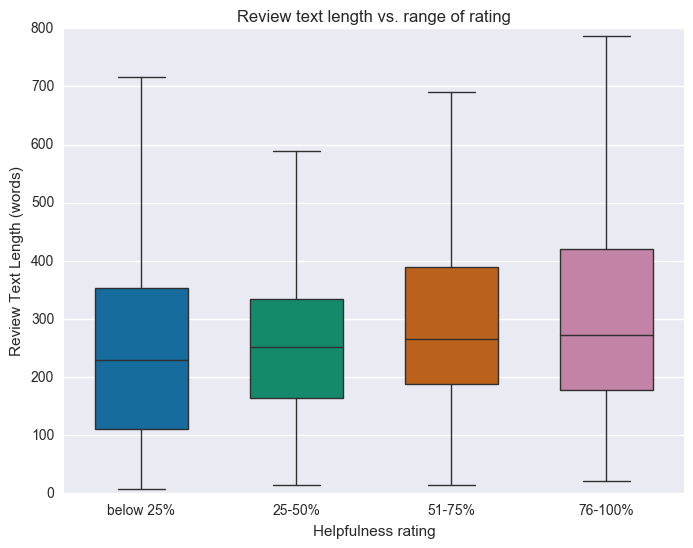

In [40]:
plt.figure(figsize=(8, 6)) 
sns.set_style("darkgrid")
sns.boxplot(y="wordLength", x="category", data=df2, palette="colorblind", linewidth= 1, showfliers=False, width = 0.6 )
sns.despine(left=True)
#plt.ylim([-50, 700])
plt.xlabel('Helpfulness rating')
plt.ylabel('Review Text Length (words)')
plt.title('Review text length vs. range of rating')

<li> Not surprisingly, these reviewers have written more than the rest (other 9 million reviews). The mean length for these reviewers is slightly higher for 50-100% than below 50%. 

### Most verbose reviewers

In [41]:
a = df2.groupby(['reviewerID', 'reviewerName'])
b = a['wordLength'].sum().sort_values(ascending = False)
dhw = pd.DataFrame(b)
dhw = dhw.reset_index()
dhw

,reviewerID,reviewerName,wordLength
0,AFVQZQ8PW0L,Harriet Klausner,5841902
1,A2F6N60Z96CAJI,Bookreporter,3505967
2,A14OJS0VWMOSWO,Midwest Book Review,1620098
3,A320TMDV6KCFU,MNix,1508548
4,A1K1JW1C5CUSUZ,"Donald Mitchell ""Jesus Loves You!""",1416486
5,A1I2O9Y3X3HXLS,Arthur W. Jordin,1334302
6,A13QTZ8CIMHHG4,"LAS Reviewer ""The Long and the Short Of It Re...",1244302
7,AMX0PJKV4PPNJ,"E. R. Bird ""Ramseelbird""",1078021
8,A328S9RN3U5M68,Grady Harp,1051096
9,A26JGAM6GZMM4V,Robert Morris,956730


### Mean text length table

In [42]:
a = df2.groupby(['reviewerID', 'reviewerName'])
b = a['wordLength'].mean().sort_values(ascending = False)
dhm = pd.DataFrame(b)
dhm = dhm.reset_index()
dhm.columns = ['reviewerID', 'reviewerName', 'meanLength']
dhm

,reviewerID,reviewerName,meanLength
0,AMX0PJKV4PPNJ,"E. R. Bird ""Ramseelbird""",872.185275
1,A1I2O9Y3X3HXLS,Arthur W. Jordin,728.330786
2,A3U7ELIED4WP4R,Dark Faerie Tales,705.307818
3,A26JGAM6GZMM4V,Robert Morris,600.961055
4,A2F6N60Z96CAJI,Bookreporter,596.455767
5,A22B13EJTZKCTM,"K. Eckert ""Devourer of all books fantasy""",512.015192
6,A2OJW07GQRNJUT,Steven H. Propp,501.657567
7,A1K1JW1C5CUSUZ,"Donald Mitchell ""Jesus Loves You!""",487.434962
8,A1D2C0WDCSHUWZ,"E. A Solinas ""ea_solinas""",463.118842
9,A22RY8N8CNDF3A,"Loyd E. Eskildson ""Pragmatist""",440.620934


### Total and helpful votes

In [43]:
a = df.groupby(['reviewerID', 'reviewerName'])
b = a['totalVote'].sum().sort_values(ascending = False)
dht = pd.DataFrame(b)
dht = dht.reset_index()
dht

,reviewerID,reviewerName,totalVote
0,AFVQZQ8PW0L,Harriet Klausner,130761
1,A14OJS0VWMOSWO,Midwest Book Review,109000
2,A1K1JW1C5CUSUZ,"Donald Mitchell ""Jesus Loves You!""",70212
3,A22RY8N8CNDF3A,"Loyd E. Eskildson ""Pragmatist""",59394
4,A2F6N60Z96CAJI,Bookreporter,42720
5,AMX0PJKV4PPNJ,"E. R. Bird ""Ramseelbird""",32474
6,A26JGAM6GZMM4V,Robert Morris,30327
7,A1M8PP7MLHNBQB,"John Matlock ""Gunny""",29581
8,A1D2C0WDCSHUWZ,"E. A Solinas ""ea_solinas""",27192
9,AHD101501WCN1,"Shalom Freedman ""Shalom Freedman""",26518


In [44]:
a = df.groupby(['reviewerID', 'reviewerName'])
b = a['helpfulVote'].sum().sort_values(ascending = False)
dhh = pd.DataFrame(b)
dhh = dhh.reset_index()
dhh

,reviewerID,reviewerName,helpfulVote
0,AFVQZQ8PW0L,Harriet Klausner,95387
1,A14OJS0VWMOSWO,Midwest Book Review,89336
2,A1K1JW1C5CUSUZ,"Donald Mitchell ""Jesus Loves You!""",63314
3,A22RY8N8CNDF3A,"Loyd E. Eskildson ""Pragmatist""",39485
4,A2F6N60Z96CAJI,Bookreporter,35865
5,AMX0PJKV4PPNJ,"E. R. Bird ""Ramseelbird""",28842
6,A26JGAM6GZMM4V,Robert Morris,27354
7,A1D2C0WDCSHUWZ,"E. A Solinas ""ea_solinas""",24020
8,A1M8PP7MLHNBQB,"John Matlock ""Gunny""",23626
9,AC1K4OQOZ90RS,"E. Bukowsky ""booklover10""",21175


### Number of reviews

In [45]:
a = df1.groupby(['reviewerID','reviewerName']).size().sort_values(ascending = False)
dha = pd.DataFrame(a)
dha = dha.reset_index()
dha.columns = ['reviewerID', 'reviewerName', 'numReviews']
dha

,reviewerID,reviewerName,numReviews
0,AFVQZQ8PW0L,Harriet Klausner,23212
1,A14OJS0VWMOSWO,Midwest Book Review,16090
2,A2F6N60Z96CAJI,Bookreporter,5878
3,A320TMDV6KCFU,MNix,4209
4,AHUT55E980RDR,Neal C. Reynolds,3061
5,A13QTZ8CIMHHG4,"LAS Reviewer ""The Long and the Short Of It Re...",2948
6,A1K1JW1C5CUSUZ,"Donald Mitchell ""Jesus Loves You!""",2906
7,A328S9RN3U5M68,Grady Harp,2795
8,A2TX179XAT5GRP,"TeensReadToo ""Eat. Drink. Read. Be Merrier.""",2527
9,A21NVBFIEQWDSG,Armchair Interviews,2526


### Summary table

In [46]:
dfr1 = pd.merge(dha, dht, how = 'inner', on=['reviewerID', 'reviewerName'])
dfr2 = pd.merge(dfr1, dhh, how = 'inner', on=['reviewerID', 'reviewerName'])
dfr3 = pd.merge(dfr2, dhw, how = 'inner', on=['reviewerID', 'reviewerName'])
dfr4 = pd.merge(dfr3, dhm, how = 'inner', on=['reviewerID', 'reviewerName'])
df_all = pd.merge(dfr4, dhr, how = 'inner', on=['reviewerID', 'reviewerName'])
df_all

,reviewerID,reviewerName,numReviews,totalVote,helpfulVote,wordLength,meanLength,percHelpful
0,AFVQZQ8PW0L,Harriet Klausner,23212,130761,95387,5841902,251.675943,0.653315
1,A14OJS0VWMOSWO,Midwest Book Review,16090,109000,89336,1620098,100.689745,0.659227
2,A2F6N60Z96CAJI,Bookreporter,5878,42720,35865,3505967,596.455767,0.677867
3,A320TMDV6KCFU,MNix,4209,14244,12224,1508548,358.410074,0.586845
4,AHUT55E980RDR,Neal C. Reynolds,3061,5904,4555,331795,108.394316,0.425362
5,A13QTZ8CIMHHG4,"LAS Reviewer ""The Long and the Short Of It Re...",2948,6464,5691,1244302,422.083446,0.532196
6,A1K1JW1C5CUSUZ,"Donald Mitchell ""Jesus Loves You!""",2906,70212,63314,1416486,487.434962,0.740617
7,A328S9RN3U5M68,Grady Harp,2795,20336,18026,1051096,376.062970,0.880532
8,A2TX179XAT5GRP,"TeensReadToo ""Eat. Drink. Read. Be Merrier.""",2527,9235,7901,770812,305.030471,0.561166
9,A21NVBFIEQWDSG,Armchair Interviews,2526,19493,16992,740568,293.178147,0.731353


#### We can sort by their helpfulness ratings

In [47]:
df_helpful = df_all.sort_values(by = 'percHelpful', ascending = False) # Sorted by helpfulness rating
df_helpful.reset_index()

,index,reviewerID,reviewerName,numReviews,totalVote,helpfulVote,wordLength,meanLength,percHelpful
0,7,A328S9RN3U5M68,Grady Harp,2795,20336,18026,1051096,376.062970,0.880532
1,31,A1MC6BFHWY6WC3,D. Blankenship,1436,9982,9370,585726,407.887187,0.877999
2,48,AMX0PJKV4PPNJ,"E. R. Bird ""Ramseelbird""",1236,32474,28842,1078021,872.185275,0.857057
3,24,A3M174IC0VXOS2,Gail Cooke,1575,16546,14314,445763,283.024127,0.827966
4,23,A26JGAM6GZMM4V,Robert Morris,1592,30327,27354,956730,600.961055,0.810562
5,32,A2MF2QVSCUI27G,"Luan Gaines ""luansos""",1427,20414,17430,579664,406.211633,0.776632
6,26,AC1K4OQOZ90RS,"E. Bukowsky ""booklover10""",1546,23488,21175,637655,412.454722,0.774243
7,30,A281NPSIMI1C2R,"Rebecca of Amazon ""The Rebecca Review""",1476,23143,20975,478956,324.495935,0.761835
8,29,A3R19YKNL641X3,"Thomas Duff ""Duffbert""",1488,15495,13882,631628,424.481183,0.758509
9,15,A1M8PP7MLHNBQB,"John Matlock ""Gunny""",1973,29581,23626,390410,197.876330,0.745602


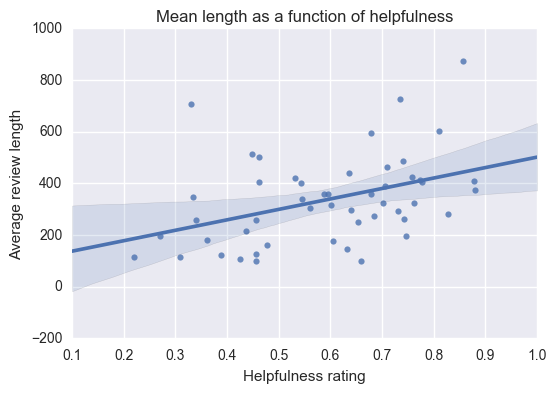

In [48]:
sns.set_style("darkgrid")
sns.regplot(df_all.percHelpful, df_all.meanLength)
plt.xlabel("Helpfulness rating")
plt.ylabel("Average review length")
plt.title ("Mean length as a function of helpfulness")
plt.show()

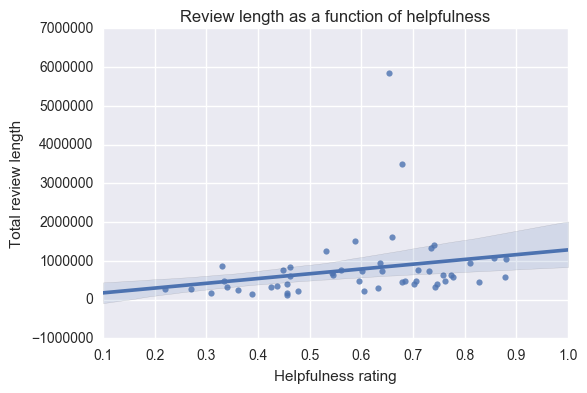

In [57]:
sns.regplot(df_all.percHelpful, df_all.wordLength)
plt.xlabel("Helpfulness rating")
plt.ylabel("Total review length")
#plt.ylim([-50000, 300000])
plt.title ("Review length as a function of helpfulness")
plt.show()

In [50]:
df_all.corr()

,numReviews,totalVote,helpfulVote,wordLength,meanLength,percHelpful
numReviews,1.000000,0.852028,0.823787,0.833775,-0.137789,0.099674
totalVote,0.852028,1.000000,0.993077,0.763031,0.079228,0.386601
helpfulVote,0.823787,0.993077,1.000000,0.740984,0.111898,0.428909
wordLength,0.833775,0.763031,0.740984,1.000000,0.272785,0.232045
meanLength,-0.137789,0.079228,0.111898,0.272785,1.000000,0.407020
percHelpful,0.099674,0.386601,0.428909,0.232045,0.407020,1.000000


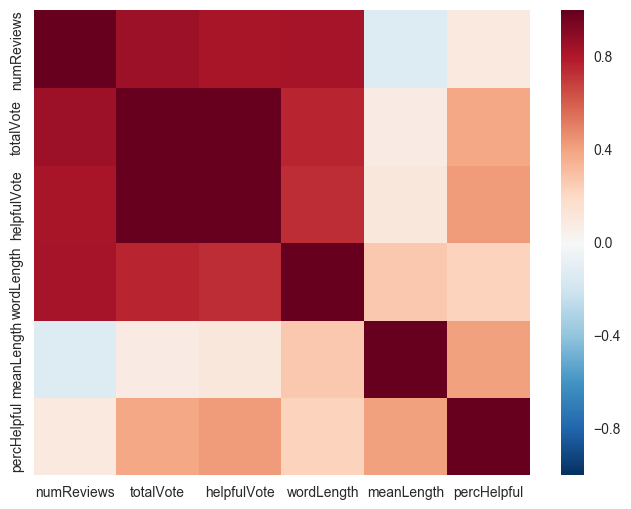

In [51]:
plt.figure(figsize = [8, 6])
sns.heatmap(df_all.corr())

Mean length and total review length (wordLength) are positively correlated with helpfulness ratings (+0.40 and +0.23)

#### We can visualize some summary statistics here

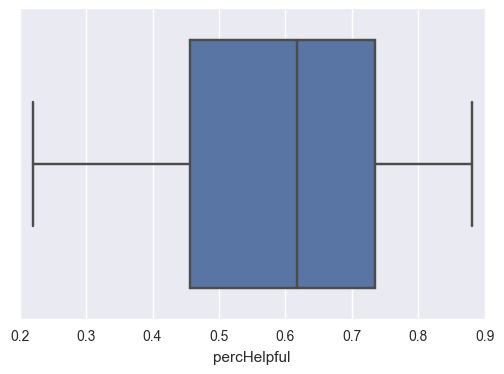

In [52]:
sns.boxplot(df_all.percHelpful)

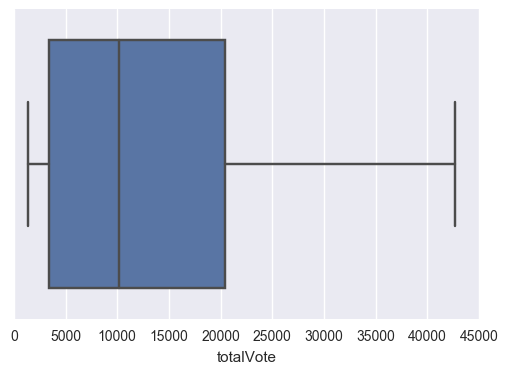

In [53]:
sns.boxplot(df_all.totalVote, showfliers=False)

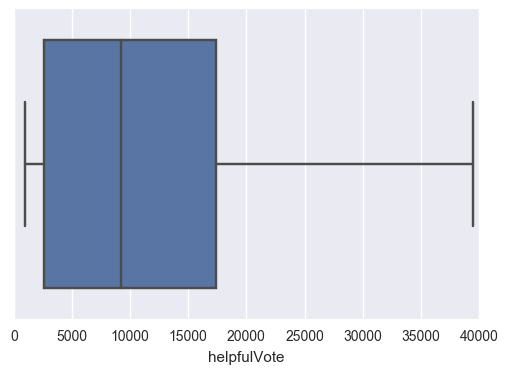

In [54]:
sns.boxplot(df_all.helpfulVote, showfliers=False)

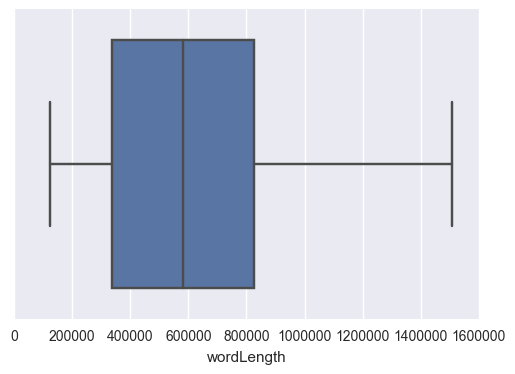

In [55]:
sns.boxplot(df_all.wordLength, showfliers=False)

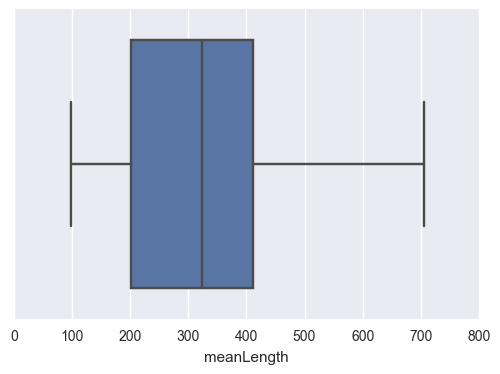

In [56]:
sns.boxplot(df_all.meanLength, showfliers=False)

#### In part II, we will look at clustering of the reviewers